# DIGIT CLASSIFIER USING MNIST

In [ ]:
from tensorflow import keras
from keras.layers import *

## Load Dataset

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

5


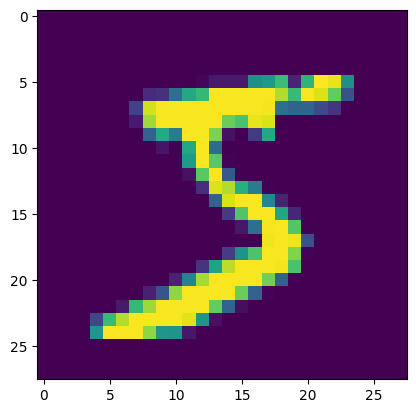

In [ ]:
# see the image and corresponding label

import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print(y_train[0])

## Preprocess Data - Min Max

In [ ]:
# divide each pixel value by 255 (pixel value ranges from 0 to 255)
x_train = x_train/255
x_test = x_test/255

## Model architecture -  ANN

In [ ]:
def ann_model_arch():
    model = keras.Sequential()

    model.add(Flatten(input_shape=(28,28)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))  # classifcation of digits

    model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
ann_model = ann_model_arch()
ann_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = ann_model.fit(x_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2981 - accuracy: 0.9146 - val_loss: 0.1551 - val_accuracy: 0.9557
Epoch 2/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1281 - accuracy: 0.9626 - val_loss: 0.1239 - val_accuracy: 0.9638
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0872 - accuracy: 0.9751 - val_loss: 0.0959 - val_accuracy: 0.9710
Epoch 4/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0636 - accuracy: 0.9809 - val_loss: 0.0956 - val_accuracy: 0.9709
Epoch 5/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0490 - accuracy: 0.9850 - val_loss: 0.0980 - val_accuracy: 0.9709
Epoch 6/20
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0385 - accuracy: 0.9883 - val_loss: 0.0850 - val_accuracy: 0.9744
Epoch 7/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0280 - accuracy: 0.9921 - val_loss: 0.0916 - val_accurac

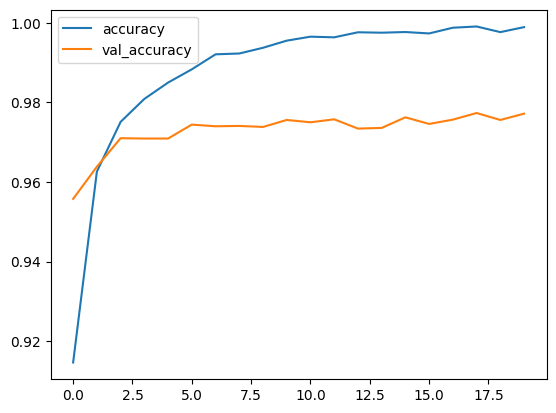

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy') # accuracy vs epochs
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()

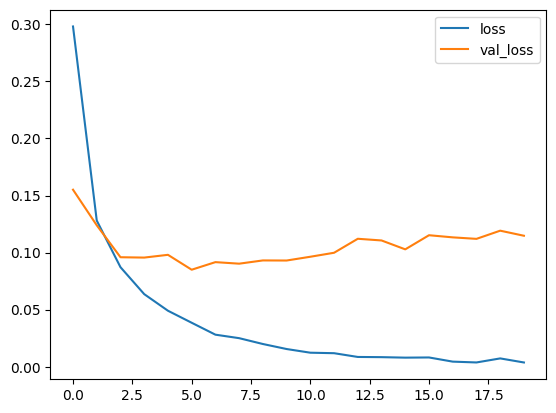

In [ ]:
plt.plot(history.history['loss'], label='loss') # cross_entropy loss vs epochs
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

## Prediction on Test Sample

In [ ]:
y_prob = model.predict(x_test)   # prediction_probabilites

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_pred = y_prob.argmax(axis=1) # find index of max prob

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9785

In [ ]:
## Accuracy is 97%
# after 2 epochs, model is overfitting, good in training but not following validation set.

## Model architecture -  CNN

In [ ]:
# reshape data
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
def cnn_model_arch():
    model = keras.Sequential()

    model.add(Conv2D(filters=16, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(28,28,1))) # single channel (b/w images)
    model.add(MaxPool2D())

    model.add(Conv2D(filters=32, kernel_size=(3,3), padding='valid', activation='relu'))
    model.add(MaxPool2D())

    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(10, activation='softmax'))  # classifcation of digits

    model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model



In [ ]:
cnn_model = cnn_model_arch()
cnn_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 800)               0         
                                                                 
 dense_10 (Dense)            (None, 128)              

In [ ]:
history = cnn_model.fit(x_train, y_train, epochs=15, validation_split=0.2)

Epoch 1/15
1500/1500 [==============================] - 38s 24ms/step - loss: 0.1867 - accuracy: 0.9426 - val_loss: 0.0765 - val_accuracy: 0.9779
Epoch 2/15
1500/1500 [==============================] - 40s 27ms/step - loss: 0.0637 - accuracy: 0.9800 - val_loss: 0.0543 - val_accuracy: 0.9836
Epoch 3/15
1500/1500 [==============================] - 39s 26ms/step - loss: 0.0449 - accuracy: 0.9861 - val_loss: 0.0456 - val_accuracy: 0.9873
Epoch 4/15
1500/1500 [==============================] - 43s 29ms/step - loss: 0.0336 - accuracy: 0.9894 - val_loss: 0.0413 - val_accuracy: 0.9877
Epoch 5/15
1500/1500 [==============================] - 31s 20ms/step - loss: 0.0268 - accuracy: 0.9915 - val_loss: 0.0396 - val_accuracy: 0.9889
Epoch 6/15
1500/1500 [==============================] - 30s 20ms/step - loss: 0.0203 - accuracy: 0.9930 - val_loss: 0.0429 - val_accuracy: 0.9887
Epoch 7/15
1500/1500 [==============================] - 31s 21ms/step - loss: 0.0184 - accuracy: 0.9940 - val_loss: 0.0345 -

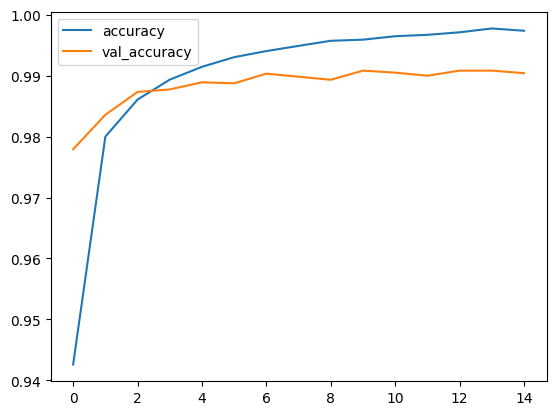

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy') # accuracy vs epochs
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()

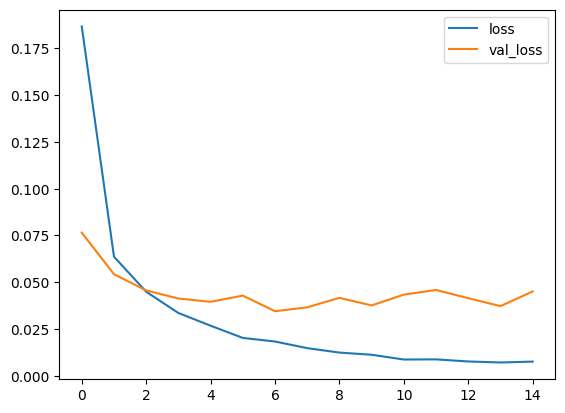

In [ ]:
plt.plot(history.history['loss'], label='loss') # cross_entropy loss vs epochs
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

## Prediction on Test Sample

In [ ]:
y_prob = cnn_model.predict(x_test)   # prediction_probabilites

313/313 [==============================] - 3s 8ms/step


In [ ]:
y_pred = y_prob.argmax(axis=1) # find index of max prob

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.99

In [ ]:
## Accuracy is 99%
# after 3 epochs, model is trying to overfit training data, so good in training but not following validation set.

### Final Comments

- ANN model doesn't take spatial arrangements of pixels, whereas CNN does take into account and to compare, CNN is better performing in image -MNIST dataset compared to ANN.

- Also, Model is trained using MNIST Data which has low image pixel size (28, 28)

## Save & load model for predictions

In [ ]:
cnn_model.save('digit-classifier.keras')

In [ ]:
# !pip install wget --quiet
import wget
from keras.preprocessing import image
from keras import models

In [ ]:
def run_pipeline(img_url:str):

    pipeline = models.load_model('digit-classifier.keras')
    if img_url.startswith("http"):
        try:
            img = wget.download(img_url)
        except Exception as e:
            return f"Problem Downloading Image-{e}", 0.0
    else:
        img = img_url

    plt.imshow(image.load_img(img))
    img_np = image.img_to_array(image.load_img(img, target_size=(28,28)).convert('L'))
    test_img = img_np.reshape((1,28,28,1))

    try:
        y = pipeline(test_img/255., training=False)
        out = y.numpy().argmax(axis=1)[0]
        prob = float(y[0][out])
    except Exception as e:
        # print('Issue with output prediction')
        return f"Issue with output prediction - Change Pipeline code - {e}", 0.0

    print(f"Digit Predcited - {out}")
    print(float(prob))

Digit Predcited - 9
0.8825857043266296


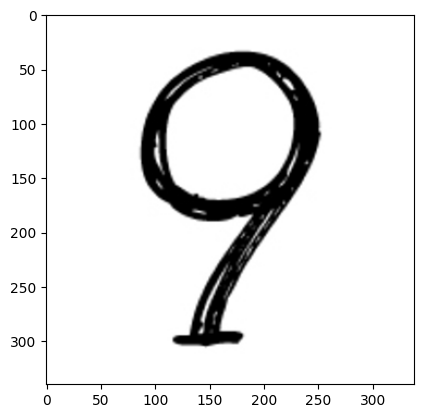

In [ ]:
run_pipeline('https://thumb.ac-illust.com/d2/d238c35f371dd75bec942ae03016c02d_t.jpeg')

Digit Predcited - 6
0.9999998807907104


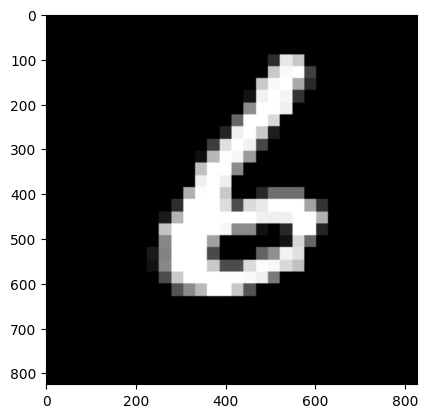

In [ ]:
run_pipeline('https://i.stack.imgur.com/RdEpj.png')